In [1]:
import gensim

In [2]:
sentences = [['the', 'boy','ran','fast'],['the', 'boy','quickly','ran']]

In [3]:
model = gensim.models.Word2Vec(sentences, min_count=1)

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('./small_data/train.csv')
test = pd.read_csv('./small_data/test.csv')

In [39]:
len(train)

4076

In [30]:
all_sentences = None
all_sentences = train['str1'].append(train['str2'])

In [47]:
x = train['str1'].append(train['str2']).append(test['str1']).append(test['str2'])

In [49]:
sentences = list(x)

In [5]:
from nltk import tokenize

In [75]:
sentences = [tokenize.word_tokenize(s) for s in sentences]

In [79]:
sentences[45]

['The',
 'group',
 'will',
 'be',
 'headed',
 'by',
 'State',
 'Department',
 'official',
 'John',
 'S.',
 'Wolf',
 ',',
 'who',
 'has',
 'served',
 'in',
 'Australia',
 ',',
 'Vietnam',
 ',',
 'Greece',
 'and',
 'Pakistan',
 '.']

In [86]:
model = gensim.models.Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)

In [94]:
model.most_similar()

[('groups', 0.9991324543952942),
 ('programs', 0.9990755319595337),
 ('sexual', 0.9990417957305908),
 ('significant', 0.9990212917327881),
 ('Moore', 0.9990087151527405),
 ('energy', 0.9989362955093384),
 ('approval', 0.9989326000213623),
 ('rules', 0.9989189505577087),
 ('guilty', 0.9988999962806702),
 ('Davis', 0.9988961219787598)]

In [3]:
# loads pre-trained word2vec (download data from https://code.google.com/archive/p/word2vec/)
from gensim.models.keyedvectors import KeyedVectors
word_vectors = KeyedVectors.load_word2vec_format('/home/erik/datasets/GoogleNews-vectors-negative300.bin', binary=True, )

In [7]:
results = word_vectors.most_similar(positive=['cat', 'tiger', 'tigers'])

In [164]:
r2 = word_vectors.vocab
type(r2)

dict

In [42]:
r2 = word_vectors.vocab
import random

keys = list(r2.keys())
random.shuffle(keys)
sample_of_words = [(k,0) for k in keys[:1000]]

In [55]:
results = results + sample_of_words

In [3]:
from sklearn.manifold import TSNE

In [50]:
t = TSNE(perplexity=50., n_iter=10000)

In [56]:
v = [word_vectors[x[0]] for x in results]

In [57]:
points = t.fit_transform(v)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
p1 = points[:10]
p2 = points[10:]
xs1 = [r[0] for r in p1]
ys1 = [r[1] for r in p1]
xs2 = [r[0] for r in p2]
ys2 = [r[1] for r in p2]

In [58]:
print results[:10], '\n\n', results[10:]

[(u'programmers', 0.5675976276397705), (u'Programmer', 0.5239194631576538), (u'coder', 0.5199723839759827), (u'computer_programmer', 0.5073486566543579), (u'graphic_designer', 0.47666358947753906), (u'programer', 0.463584840297699), (u'designer', 0.4621824622154236), (u'coders', 0.45871683955192566), (u'librarian', 0.4511215388774872), (u'technologist', 0.43002596497535706)] 

[(u'Adrea', 0), (u'outboard_engine', 0), (u'King_Birendra_Gyanendra', 0), (u'trizzo@kcstar.com', 0), (u'Equitable_Sharing', 0), (u'Ishares', 0), (u'BRAINERD_Minn.', 0), (u'Ifeanyi_Koggu', 0), (u'dsPIC_DSCs', 0), (u'Bernard_Berrian', 0), (u'Bobby_Dellimuti', 0), (u'Veena_Malik', 0), (u'Matawan_Aberdeen_Middle', 0), (u'Promius_Pharmaceuticals_wholly_owned', 0), (u"Lihu'e_HI_#####", 0), (u'TOM_GANTERT', 0), (u'Miskowski', 0), (u'Greg_Skubisz', 0), (u'Claude_Camire', 0), (u'Sara_Baras', 0), (u'Exclaim', 0), (u'JAMESTOWN_Va.', 0), (u'Naonka', 0), (u'Dayla', 0), (u'anticoagulant_reversing_agent', 0), (u'Karzkan_opposit

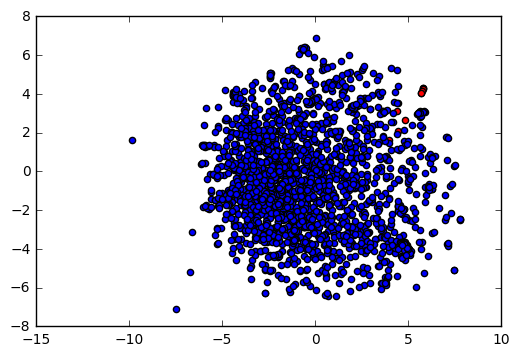

In [59]:
plt.scatter(xs1,ys1, c='red')
plt.scatter(xs2,ys2, c='blue')

In [54]:
results = word_vectors.most_similar(positive=['programmer', 'woman'], negative=['man'])

In [162]:
results

[(u'programmers', 0.5675976276397705),
 (u'Programmer', 0.5239194631576538),
 (u'coder', 0.5199723839759827),
 (u'computer_programmer', 0.5073486566543579),
 (u'graphic_designer', 0.47666358947753906),
 (u'programer', 0.463584840297699),
 (u'designer', 0.4621824622154236),
 (u'coders', 0.45871683955192566),
 (u'librarian', 0.4511215388774872),
 (u'technologist', 0.43002596497535706)]